# Predicting Customer Churn for Telco Systems  <a class="tocSkip">

## Notebook 1/4 - Loading and Cleaning Data <a class="tocSkip">

by: __Neel Chudasama__

This notebook contains the steps I took to load my data and clean my data. 

__Notebook Contents__

1. [Introduction](#intro)
2. [Loading and Studying the Data](#load)
3. [Conclusions](#conc)

<a id='intro'></a>
# Introduction

## Problem Statement 

Churn prediction involves detecting which customers are likely to leave or cancel a subscription to a service. It is a critical metric for companies and crucial that companies are able to accurately predict when this would happen. Acquiring a new customer can cost five times more than retaining an existing customer. Increasing customer retention by just a mere 5% can increase profits 25-95%. The success rate of selling to a current customer is 60-70% meanwhile the success rate of selling to a new customer is 5-20%. 

Every time a client leaves, it represents a significant investment lost. Both time and effort need to be channelled into replacing them. Being able to predict when a client is likely to leave, and offer them incentives to stay, can offer huge savings to a business and increase profit margins.

In this project I will be using Telco as a case study, delving deep into the data to determine what characteristics cause customers to churn and what customer retention programs they can put in place to ensure that they keep hold of their customers. By the end of this project I will provide Telco with valuable insights into what services are causing churn and should be optimised, as well as, certain customers they should market towards more to help retain them.

The data used in this project was obtained from Kaggle, with the source being IBM. It contains a large amount of a columns relating to specific services provided by the company as well as data sepcific to the customer.

## Importing Libraries

I have created a set of functions which I imported from my capstone_utils library. This was to streamline the basic EDA process and get an idea of the dataframe. 

In [1]:
#Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
from scipy import stats
import capstone_utils

<a id='load'></a>
# Loading and Studying the Data

## Data and Column Descriptions

Before the data can be studied and cleaned, the dataset must first be imported in. 

In [2]:
# Read in data from my data folder
df = pd.read_csv('Raw_data/telco_customer_churn.csv')

#### Column Descriptions

The table below demonstrates the columns in the dataframe and the data that is held within each column. 

| Column | Description |
| :- | :- |
| customerID | Contains the ID number for each specific customer. |
| Gender | The gender of the customer; Male or Female |
| SeniorCitizen | Whether the customer is above the age of 65 or not |
| Partner | Whether the customer has a partner; Yes or No |
| Dependents | Whether the customer has any children or not; Yes or No |
| tenure | How long the customer has been with the company in months; integer from 0 - 100 |
| PhoneService | Whether the customer pays for a phone service from the company; Yes, No or No internet service |
| MultipleLines | Whether the customer has multiple phone lines with the company; Yes, No or No phone service |
| InternetService | Whether the customer signed up for internet service or not; DSL, Fiber Optic or No service |
| OnlineSecurity | Whether the customer signed up for Online Security or not; DSL, Fiber Optice or No service |
| OnlineBackup | Whether the customer signed up for Online Backup or not; DSL, Fiber Optice or No service |
| DeviceProtection | Whether the customer has device protection or not; Yes, No or No internet service |
| TechSupport | Whether the customer has signed up for Tech support or not; Yes, No or No internet service |
| StreamingTV | Whether the customer signed up for the Streaming TV service or not; Yes, No or No internet service |
| StreamingMovies | Whether the customer signed up for the Streaming movies service or not; Yes, No or No internet service |
| PaperlessBilling | Whether the customer has signed up for the paperless billing service or not; Yes or no |
| PaymentMethod | What type of payment method does the customer use; Electronic check, Mailed CHeck, Bank transfer (automatic), Credit Car (automatic) |
| MonthlyCharges | What is the monthly charge the cutomer pays; 18.25 to 118.75 dollars |
| TotalCharges | The total amount a customer pays during the term of the contract |
| Churn | Whether the customer leaves the company (churns) or not; Yes or no |

In [3]:
capstone_utils.eda(df)


Rows: 7043 	 Columns: 21

Total null rows: 0
Percentage null rows: 0.0%

Total duplicate rows: 0
Percentage dupe rows: 0.0%

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
-----


The head of the dataframe is: 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



The tail of the dataframe is:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No



Description of the numerical columns is as follows


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


After conducting researach on the dataframe, I was able to determine that a Senior citizen is defined as someone who is 65 years or older, as this was initially quite confusing. It is worth noting that the SeniorCitizen is a categorical column that has been converted into binary form. This is the only categorical column in the dataframe which is demonstrated like so. Furthermore, the first thing I noticed is that the Churn column is our target variable but it is in an a string datatype, in the form of "yes" or "no". I want to convert this to a binary column which returns 1 for yes or 0 for no. 

In [4]:
capstone_utils.binarise_data(['Churn'],df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [5]:
#Sanity check for determining what data type the Churn column is
df['Churn'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.1 KB


Looking at the .info on the data types for each of the columns in the dataframe is correct apart from totalcharges. It seems to be in the form of a string meanwhile it holds numbers. It needs to be changed to a float, given that it holds decimal values.

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

By setting errors=’coerce’, I have transformed the non-numeric values into NaN. So to make sure that there are no NaN values in the column, I can check with the following command.

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It seems there were blank values in the total charges column which were converted to NaN values when I used the pd_to_numeric command. I want to make sure that there are any more blank values in the dataframe. But first I want to return the 11 rows where the Total Charges have blank values in them.

In [8]:
df[df.isna().any(axis = 1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


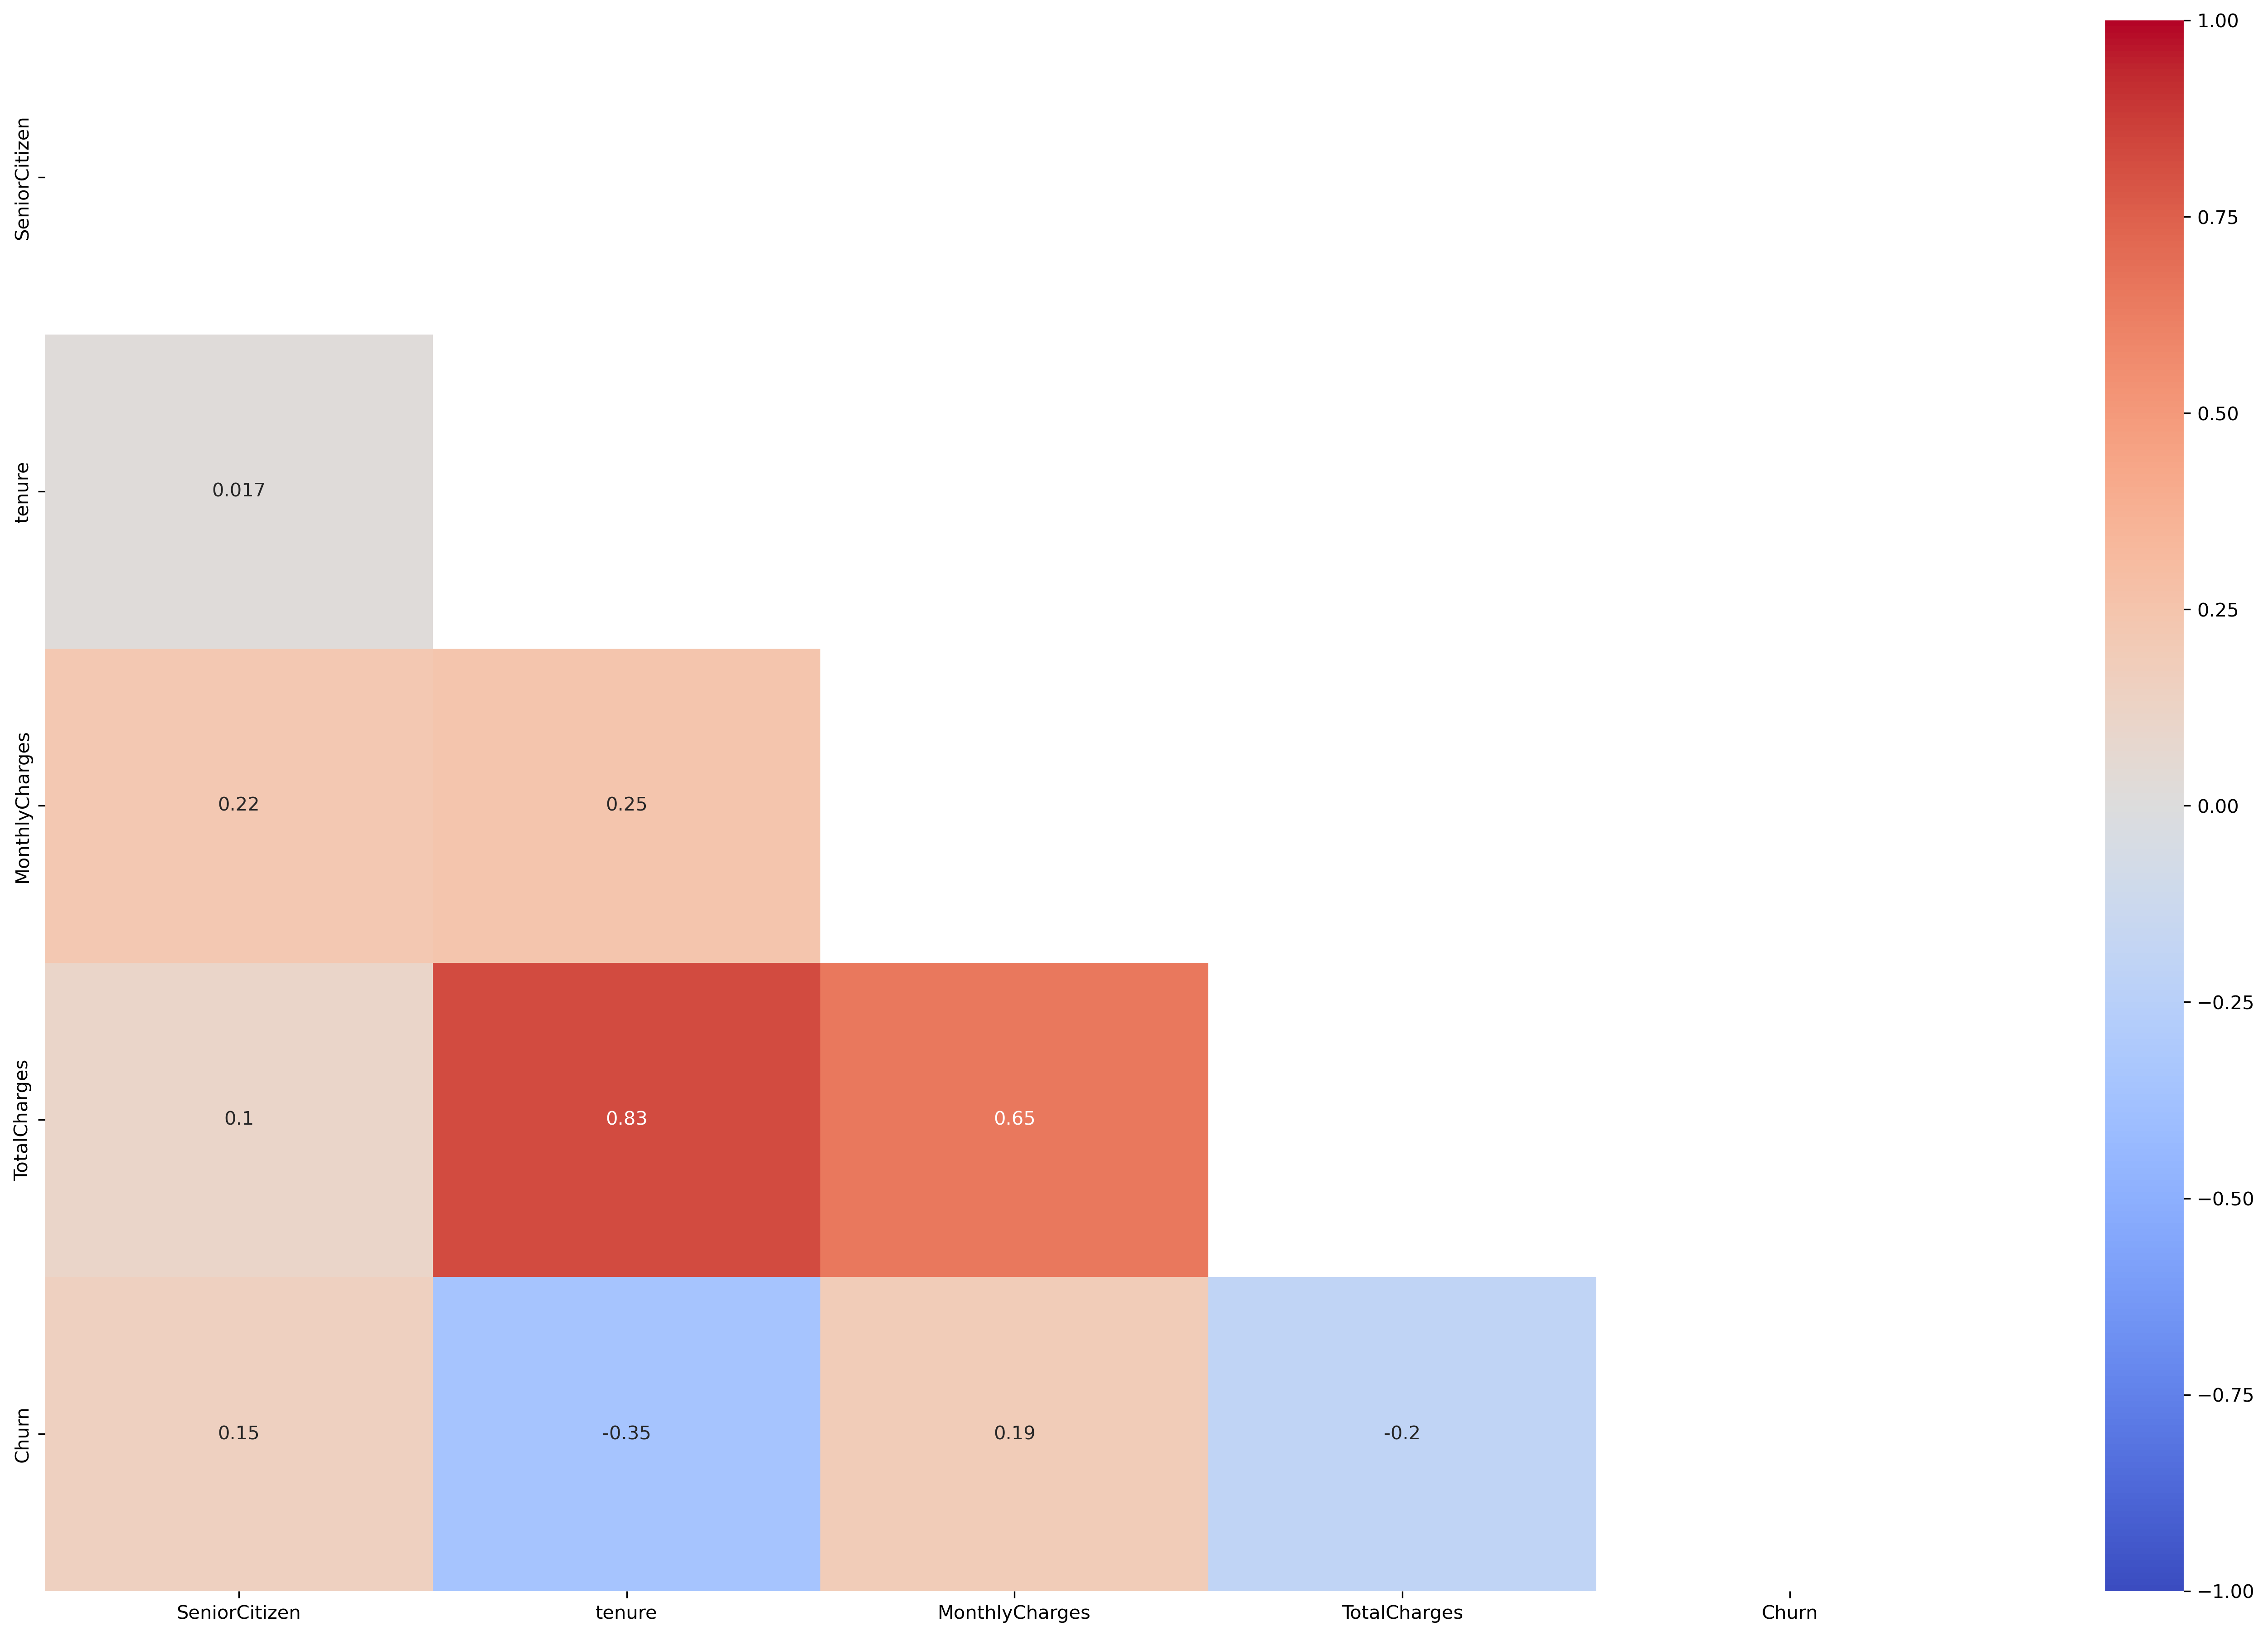

In [9]:
capstone_utils.heat_map(df)

Looking at the correlation between all the columns, it is clear to see that there is a high correlation between the total charges and tenure. Also, there is a high correlation between the total charges and the monthly charges. From this table it is clear to see that these two columns are part of the total charges values. 

In [10]:
sample = df.sample(10)

In [11]:
sample['MonthlyCharge*Tenure'] = sample['tenure']*sample['MonthlyCharges']

In [12]:
sample['Difference'] = sample['MonthlyCharge*Tenure']-sample['TotalCharges']

In [13]:
sample

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharge*Tenure,Difference
6735,6365-HITVU,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Credit card (automatic),87.25,6328.70,0,6194.75,-133.95
6741,2180-DXNEG,Female,0,No,No,12,Yes,No,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,96.00,1062.10,1,1152.00,89.90
6716,9850-OWRHQ,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Credit card (automatic),74.10,228.00,1,222.30,-5.70
213,4709-LKHYG,Female,0,Yes,Yes,29,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Electronic check,20.00,540.05,0,580.00,39.95
3059,7503-EPSZW,Female,0,Yes,Yes,64,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,Yes,Mailed check,24.05,1559.15,0,1539.20,-19.95
4369,2592-SEIFQ,Male,0,No,No,3,No,No phone service,DSL,No,...,No,No,Month-to-month,No,Electronic check,24.75,66.95,1,74.25,7.30
3655,6878-GGDWG,Female,0,Yes,No,32,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.40,641.15,0,620.80,-20.35
80,5919-TMRGD,Female,0,No,Yes,1,Yes,No,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Electronic check,79.35,79.35,1,79.35,0.00
4837,5134-IKDAY,Female,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,69.80,69.80,1,69.80,0.00
1695,4906-ZHGPK,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,...,Yes,No,One year,Yes,Electronic check,70.70,3770.00,0,3817.80,47.80


There is a discrepancy between the "MonthlyCharge * Tenure" column and the TotalCharges column. From external research on the dataset, certain customers may have had discount codes to attract them to the service. Looking at the sample data there seems to be connection between when I calculated the total charge higher than the actual value and cases when I calculated lower than the actual value. Therefore, for the missing 11 rows I have chosen to impute the values by multiplying the tenure and monthly charges together.

In [14]:
df[df.isna().any(axis = 1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


However, from further analysis of the NaN values - looking at the dataframe above the reason for the NaN values is that the tenure for these customers is 0. This may be due to an error in inputting data in the dataframe or these customers joined Telco and left before they were able to make a monthly payment. However, referring to other data such as the services provided by Telco - more than half of customers seem to have applied for the most basic package which involved Phone service and maybe multiple lines. Just below half of the other customers were subscribed to more services which seems strange as to why they may have left before the first monthly payment. The other noticeable piece of data is the fact that all these customers were on two year contracts which binds them into paying for two years or paying a fee to cut the contract early. With this piece of information at hand, I feel that there is an error in inputting the data causing the tenure to be 0 and concurrently the Total Charges column = NaN.

In [15]:
df.isnull().sum()/df.shape[0]*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

Looking at the output above, only 0.15% of the TotalCharges column are null values which is a very small amount. So my method is to drop these rows. 

In [16]:
df = df.dropna()
df = df.reset_index(drop = True)

In [17]:
#Sanity Check 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Given that my basic eda returned that there were no null values, but after changing my TotalCharges column to numeric it converted blank values to NaN values. I was concerned that this was the case for other columns. So the following commands below helped to determine if there were any other blank values.

In [18]:
for i in df.columns:
    print(df[i].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
[0 1]


Looping through the columns and looking for the unique values for certain columns it is easy to determine by eye whether the columns have blank cells or not. However, for certain columns it is not, such as CustomerID and MonthlyCharges. I first wanted to check the CustomerID value, by sorting this table the blank values would either be at the start of that list or at the end. It is clear to see that there are no blank values in the customerID column.

In [19]:
#[print(i) for i in sorted(list(df['customerID'].unique()))]
#Commented out as output is very large list

In [20]:
#Sanity check
df['customerID'].nunique()

7032

Looking at the list it is clear to see that there are no blank values. Next, determining whether there are any blank values in the MonthlyCharges column. I wanted to plot the histogram of the column and it is clear to see that there are no blank values. Given that the column is a float64 datatype if there were any blank value it would be returned to 0. 

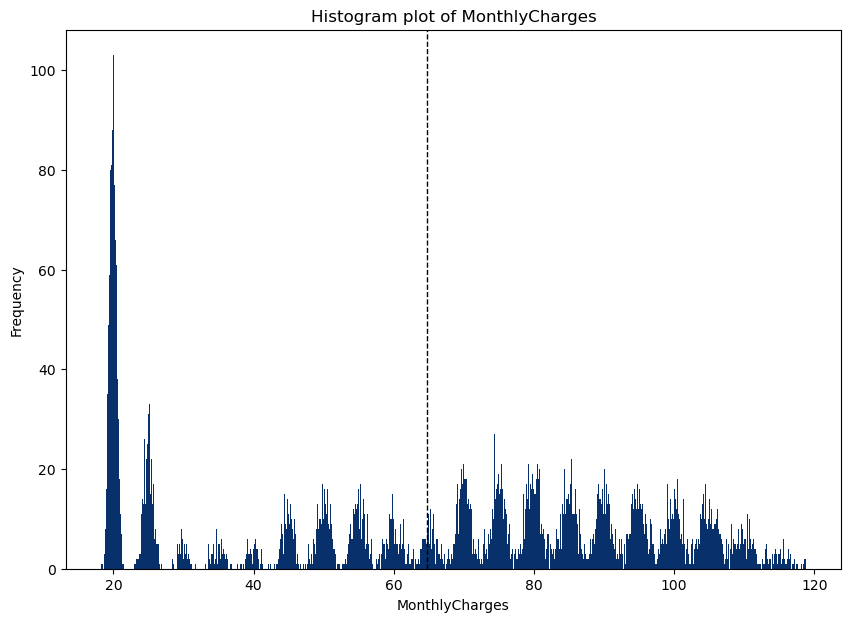

In [21]:
capstone_utils.df_histogram(df, 'MonthlyCharges', bins =1000, colormap= 'Blues_r')

However, to make sure that is the case, with the help of the following command I can determine that. 

In [22]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

From the above command the lowest value is 18.25 which would mean that there are no values where the value was blank and changed to 0.

## Saving Work

Save the cleaned dataframe in a pkl file in my data folder

In [23]:
joblib.dump(df, 'data/telco_df.pkl')

['data/telco_df.pkl']

<a id='conc'></a>
# Conclusions

In this notebook, I have completed some basic cleaning steps to the dataframe and that it is the highest quality to conduct deeper EDA. This will provide me with the most accurate insights into trends and greatly assist my analysis.